Naive Bayes

Navaneeth Krishnan
12-10-22

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv('spam.csv',encoding='latin-1')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [8]:
df= df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)

In [10]:
df = df.rename(columns={"v1":"label", "v2":"sms"})
df.head()

,label,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
print(len(df))

5572


In [12]:
df.describe()

,label,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [13]:
df['length']=df['sms'].apply(len)
df.head()

,label,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [16]:
x=df['sms']
y=df['label']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=1)
print(x_train)

710     Height of Confidence: All the Aeronautics prof...
3740                                        2/2 146tf150p
2711    Wen ur lovable bcums angry wid u, dnt take it ...
3155                    Long time. You remember me today.
3748    Dear Voucher Holder 2 claim your 1st class air...
                              ...                        
905     Hey what's up charles sorry about the late reply.
5192    Oh oh... Den muz change plan liao... Go back h...
3980    Huh i cant thk of more oredi how many pages do...
235     I have printed it oh. So  &lt;#&gt;  come upst...
5157                              K k:) sms chat with me.
Name: sms, Length: 4179, dtype: object


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
count_vector=CountVectorizer()

In [19]:
train_data=count_vector.fit_transform(x_train)
test_data=count_vector.transform(x_test)

In [22]:
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB()
classifier.fit(train_data, y_train)

MultinomialNB()

In [23]:
print(test_data)

  (0, 1934)	1
  (0, 3333)	1
  (0, 4527)	1
  (0, 5473)	1
  (0, 6712)	1
  (1, 967)	1
  (1, 2589)	1
  (1, 3088)	1
  (1, 4219)	1
  (1, 6712)	1
  (1, 7491)	1
  (2, 736)	1
  (2, 922)	1
  (2, 1175)	1
  (2, 1579)	1
  (2, 1825)	1
  (2, 1897)	1
  (2, 3636)	3
  (2, 4527)	1
  (2, 4658)	1
  (2, 4997)	1
  (2, 5522)	1
  (2, 5588)	1
  (2, 5816)	1
  (2, 6126)	1
  :	:
  (1390, 1040)	1
  (1390, 2248)	1
  (1390, 2760)	1
  (1390, 3653)	1
  (1390, 4766)	1
  (1390, 4823)	1
  (1390, 6983)	1
  (1390, 7042)	1
  (1391, 1151)	1
  (1391, 1579)	1
  (1391, 3047)	1
  (1391, 5494)	1
  (1391, 6270)	1
  (1391, 6607)	1
  (1391, 7447)	1
  (1392, 2262)	1
  (1392, 2587)	1
  (1392, 3108)	1
  (1392, 3253)	1
  (1392, 4658)	1
  (1392, 4788)	1
  (1392, 5272)	1
  (1392, 6647)	1
  (1392, 7232)	1
  (1392, 7436)	1


In [24]:
y_pred=classifier.predict(test_data)
print(y_pred)

['ham' 'ham' 'ham' ... 'ham' 'ham' 'ham']


In [26]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[1205    8]
 [  12  168]]


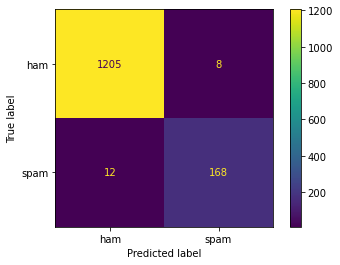

In [30]:
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
display_labels=classifier.classes_)
disp.plot()

In [32]:
training_score=classifier.score(train_data,y_train)
test_score=classifier.score(test_data,y_test)
print(training_score)
print(test_score)

0.9937784158889686
0.9856424982053122


In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy score: {}'.format(accuracy_score(y_test, y_pred)))
print('Precision score: {}'.format(precision_score(y_test, y_pred,pos_label="spam")))
print('Recall score: {}'.format(recall_score(y_test, y_pred,pos_label="spam")))
print('F1 score: {}'.format(f1_score(y_test, y_pred,pos_label="spam")))

Accuracy score: 0.9856424982053122
Precision score: 0.9545454545454546
Recall score: 0.9333333333333333
F1 score: 0.9438202247191012


In [34]:
!pip install wordcloud
from wordcloud import WordCloud

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 458 kB 2.8 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


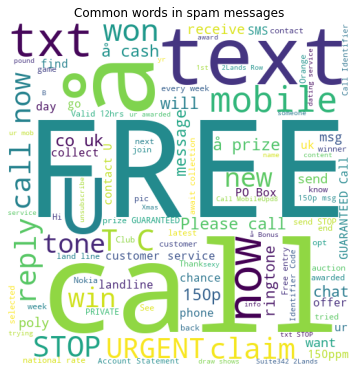

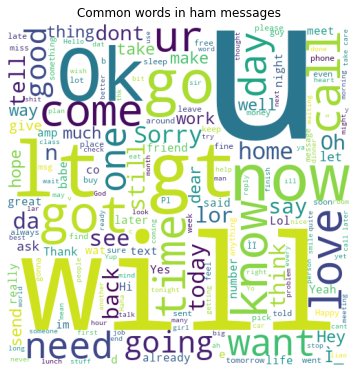

In [37]:
spam=df[df['label']=='spam']['sms'].str.cat(sep=',')
ham=df[df['label']=='ham']['sms'].str.cat(sep=',')
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color ='white')
spam_wc = wc.generate(spam)
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(spam_wc)
plt.axis("off")
plt.title("Common words in spam messages")
plt.tight_layout(pad = 0)
plt.show()

ham_wc = wc.generate(ham)
plt.figure(figsize = (5, 5), facecolor = None)
plt.imshow(ham_wc)

plt.axis("off")
plt.title("Common words in ham messages")
plt.tight_layout(pad = 0)
plt.show()